In [20]:
import kasatochi_example as ke
#import kasatochi
from monetio.models import hysplit
from monetio.models import pardump
from utilhysplit import par2conc
import numpy as np
import feature_tracking 

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load Kasatochi data from runKC and KD

In [ ]:
kas1 = ke.KasatochiExample()
kas1.stime = datetime.datetime(2008,8,8,4)
kas1.etime = datetime.datetime(2008,8,10,21)

In [70]:
pdumpC = kas1.get_pdump("C",verbose=False)

Adding data  [(28, 1096, 1, 8, 8, 8, 4, 0)] 2008-08-08 04:00:00
Adding data  [(28, 6576, 1, 8, 8, 8, 5, 0)] 2008-08-08 05:00:00
Adding data  [(28, 9864, 1, 8, 8, 8, 6, 0)] 2008-08-08 06:00:00
Adding data  [(28, 13151, 1, 8, 8, 8, 7, 0)] 2008-08-08 07:00:00
Adding data  [(28, 16436, 1, 8, 8, 8, 8, 0)] 2008-08-08 08:00:00
Adding data  [(28, 19718, 1, 8, 8, 8, 9, 0)] 2008-08-08 09:00:00
Adding data  [(28, 22995, 1, 8, 8, 8, 10, 0)] 2008-08-08 10:00:00
Adding data  [(28, 26271, 1, 8, 8, 8, 11, 0)] 2008-08-08 11:00:00
Adding data  [(28, 29544, 1, 8, 8, 8, 12, 0)] 2008-08-08 12:00:00
Adding data  [(28, 26228, 1, 8, 8, 8, 13, 0)] 2008-08-08 13:00:00
Adding data  [(28, 26188, 1, 8, 8, 8, 14, 0)] 2008-08-08 14:00:00
Adding data  [(28, 26152, 1, 8, 8, 8, 15, 0)] 2008-08-08 15:00:00
Adding data  [(28, 26091, 1, 8, 8, 8, 16, 0)] 2008-08-08 16:00:00
Adding data  [(28, 26029, 1, 8, 8, 8, 17, 0)] 2008-08-08 17:00:00
Adding data  [(28, 25989, 1, 8, 8, 8, 18, 0)] 2008-08-08 18:00:00
Adding data  [(28, 

In [71]:
pdumpD = kas1.get_pdump("D",verbose=False)

Adding data  [(28, 1096, 1, 8, 8, 8, 4, 0)] 2008-08-08 04:00:00
Adding data  [(28, 6576, 1, 8, 8, 8, 5, 0)] 2008-08-08 05:00:00
Adding data  [(28, 9864, 1, 8, 8, 8, 6, 0)] 2008-08-08 06:00:00
Adding data  [(28, 13151, 1, 8, 8, 8, 7, 0)] 2008-08-08 07:00:00
Adding data  [(28, 16437, 1, 8, 8, 8, 8, 0)] 2008-08-08 08:00:00
Adding data  [(28, 19722, 1, 8, 8, 8, 9, 0)] 2008-08-08 09:00:00
Adding data  [(28, 22999, 1, 8, 8, 8, 10, 0)] 2008-08-08 10:00:00
Adding data  [(28, 26271, 1, 8, 8, 8, 11, 0)] 2008-08-08 11:00:00
Adding data  [(28, 29541, 1, 8, 8, 8, 12, 0)] 2008-08-08 12:00:00
Adding data  [(28, 26225, 1, 8, 8, 8, 13, 0)] 2008-08-08 13:00:00
Adding data  [(28, 26172, 1, 8, 8, 8, 14, 0)] 2008-08-08 14:00:00
Adding data  [(28, 26126, 1, 8, 8, 8, 15, 0)] 2008-08-08 15:00:00
Adding data  [(28, 26069, 1, 8, 8, 8, 16, 0)] 2008-08-08 16:00:00
Adding data  [(28, 26014, 1, 8, 8, 8, 17, 0)] 2008-08-08 17:00:00
Adding data  [(28, 25962, 1, 8, 8, 8, 18, 0)] 2008-08-08 18:00:00
Adding data  [(28, 

In [72]:
%autoreload
poll=4
lev=[1000,20000]
pdate = datetime.datetime(2008,8,10,12)
dfD = ke.process_pdump(pdumpD, pdate,lev=lev,poll=poll)
dfC = ke.process_pdump(pdumpC, pdate,lev=lev,poll=poll)

working on 5
working on 10
working on 15
working on 20
working on 25
working on 30
working on 35
working on 40
working on 45
working on 50
working on 55
working on 60
working on 65


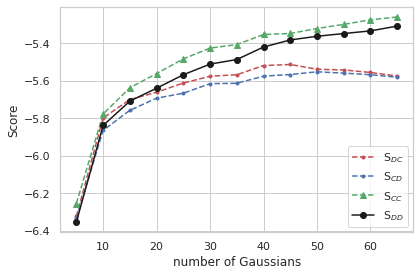

In [84]:
%autoreload
figname = 'score_kasD_kasC_101200'
nlist = np.arange(5,70,5)
score = feature_tracking.find_n(dfD, dfC, nlist=nlist, method='gmm', name1='D', name2='C',verbose=True,figname=figname)

In [81]:
# Look at a different time period.
%autoreload
poll=4
lev=[1000,20000]
pdate = datetime.datetime(2008,8,9,4)
dfDk2 = ke.process_pdump(pdumpD, pdate,lev=lev,poll=poll)
dfCk2 = ke.process_pdump(pdumpC, pdate,lev=lev,poll=poll)

working on 5
working on 10
working on 15
working on 20
working on 25
working on 30
working on 35
working on 40
working on 45
working on 50
working on 55
working on 60
working on 65


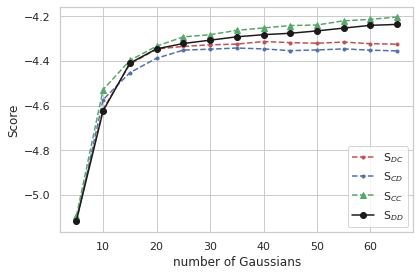

In [83]:
%autoreload
nlist = np.arange(5,70,5)
figname = 'score_kasD_kasC_090400'
score = feature_tracking.find_n(dfDk2, dfCk2, nlist =nlist, name1='D', name2='C',verbose=True,figname=figname)
ax = plt.gca()
ax.text()

### Load data from CAPTEX 1 for RunC and RunD

In [92]:
%load_ext autoreload
%autoreload
import captex_example as ce

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#CAPTEX 1
c1 = ce.CaptexExample()

In [56]:
# Look at one time period.
d1 = c1.stime
d2 = d1 + datetime.timedelta(minutes=3*60)
t1capdfC = c1.get_pdump(1, drange=[d2,d2])
t1capdfD = c1.get_pdump(3, drange=[d2,d2])

opening ./RunFiles/RunC/PARDUMP.cap1
Adding data  [(28, 5004, 1, 83, 9, 19, 0, 0)] 1983-09-19 00:00:00
opening ./RunFiles/RunD/PARDUMP.cap1
Adding data  [(28, 5004, 1, 83, 9, 19, 0, 0)] 1983-09-19 00:00:00


In [68]:
t1capdfC.date.unique()

array(['1983-09-19T00:00:00.000000000'], dtype='datetime64[ns]')

working on 5
working on 10
working on 15
working on 20
working on 25
working on 30
working on 35
working on 40
working on 45
working on 50
working on 55
working on 60
working on 65


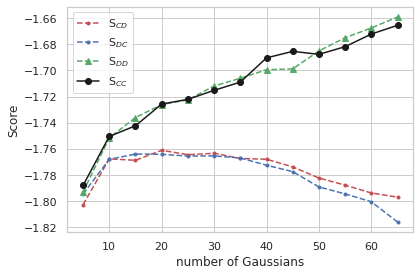

In [85]:
nlist=list(np.arange(5,70,5))
fname='scores_capC_capD_091900'
scoret1 = feature_tracking.find_n(t1capdfC, t1capdfD, nlist =nlist, name1='C', name2='D',verbose=True,figname=fname)

In [62]:
# a different time period
d1 = c1.stime
d2 = d1 + datetime.timedelta(minutes=6*60)
t2capdfC = c1.get_pdump(1, drange=[d2,d2])
t2capdfD = c1.get_pdump(3, drange=[d2,d2])

opening ./RunFiles/RunC/PARDUMP.cap1
Adding data  [(28, 5004, 1, 83, 9, 19, 3, 0)] 1983-09-19 03:00:00
opening ./RunFiles/RunD/PARDUMP.cap1
Adding data  [(28, 5004, 1, 83, 9, 19, 3, 0)] 1983-09-19 03:00:00


In [65]:
t2capdfC.date.unique()

array(['1983-09-19T03:00:00.000000000'], dtype='datetime64[ns]')

working on 5
working on 10
working on 15
working on 20
working on 25
working on 30
working on 35
working on 40
working on 45
working on 50
working on 55
working on 60
working on 65


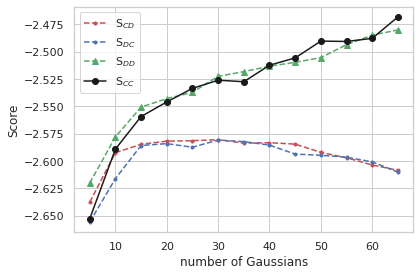

In [86]:
nlist=list(np.arange(5,70,5))
fname='scores_capC_capD_091903'
scoret2 = feature_tracking.find_n(t2capdfC, t2capdfD, nlist =nlist, name1='C', name2='D',verbose=True,figname=fname)

In [87]:
# Look at one time period.
d1 = c1.stime
d2 = d1 + datetime.timedelta(minutes=12*60)
t3capdfC = c1.get_pdump(1, drange=[d2,d2])
t3capdfD = c1.get_pdump(3, drange=[d2,d2])

opening ./RunFiles/RunC/PARDUMP.cap1
Adding data  [(28, 5004, 1, 83, 9, 19, 9, 0)] 1983-09-19 09:00:00
opening ./RunFiles/RunD/PARDUMP.cap1
Adding data  [(28, 5004, 1, 83, 9, 19, 9, 0)] 1983-09-19 09:00:00


In [88]:
t3capdfC.date.unique()

array(['1983-09-19T09:00:00.000000000'], dtype='datetime64[ns]')

working on 5
working on 10
working on 15
working on 20
working on 25
working on 30
working on 35
working on 40
working on 45
working on 50
working on 55
working on 60
working on 65


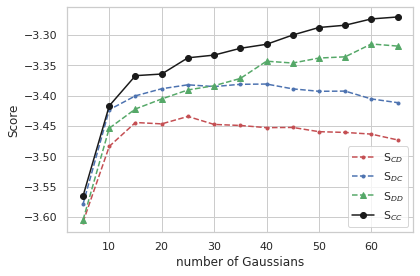

In [90]:
nlist=list(np.arange(5,70,5))
fname='scores_capC_capD_091909'
scoret3 = feature_tracking.find_n(t3capdfC, t3capdfD, nlist =nlist, name1='C', name2='D',verbose=True,figname=fname)